# Assignment 3

---

#### Name:
#### Student ID:

---

## Basic imports

In [1]:
from IPython.display import display, Math

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
 cmap = mpl.colors.ListedColormap(['pink', 'gray'])
 rng = np.random.default_rng()

# Linear Regression

## Data Generation 

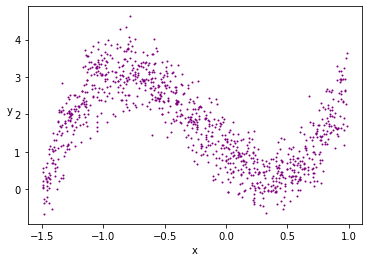

In [3]:
X = np.sort(rng.uniform(-1.5, 1.0, (1000, 1)), axis=0)
Y = 3 * (X ** 3) + 2 * (X ** 2) - 3 * X + 1 + rng.normal(0, 0.5, (1000, 1))
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x=X, y=Y, s=1, c="purple")
ax.set_xlabel("x")
ax.set_ylabel("y", rotation="horizontal")
fig.show()

## Data Preprocessing

In [4]:
preprocessor_1 = PolynomialFeatures(degree=1)
X1 = preprocessor_1.fit_transform(X)
preprocessor_2 = PolynomialFeatures(degree=2)
X2 = preprocessor_2.fit_transform(X)
preprocessor_3 = PolynomialFeatures(degree=3)
X3 = preprocessor_3.fit_transform(X)
preprocessor_4 = PolynomialFeatures(degree=4)
X4 = preprocessor_4.fit_transform(X)

## Model Construction

In [5]:
%%capture
model1 = LinearRegression()
model1.fit(X1, Y)
model2 = LinearRegression()
model2.fit(X2, Y)
model3 = LinearRegression()
model3.fit(X3, Y)
model4 = LinearRegression()
model4.fit(X4, Y)

## Results 

In [6]:
def generate_label(model):
    coef = ['+{:.2f}'.format(x) if x > 0 else '{:.2f}'.format(x) for x in model.coef_[0]]
    coef[0] = '{:.2f}'.format(model.intercept_[0])
    
    label = "${}{} x_i"
    for i in range(2, len(coef)):
        label += " {{}} x_i^{}".format(i)
    label += "$"
    return label.format(*coef)

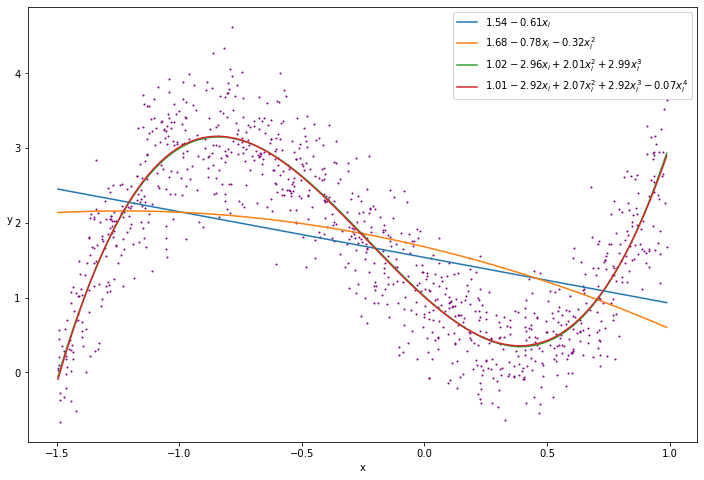

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
ax.scatter(x=X, y=Y, s=1, c="purple")
ax.plot(X, model1.predict(X1), label=generate_label(model1))
ax.plot(X, model2.predict(X2), label=generate_label(model2))
ax.plot(X, model3.predict(X3), label=generate_label(model3))
ax.plot(X, model4.predict(X4), label=generate_label(model4))
ax.legend(loc='upper right')
ax.set_xlabel("x")
ax.set_ylabel("y", rotation="horizontal")
fig.show()

# Logistic Regression

## Data Generation

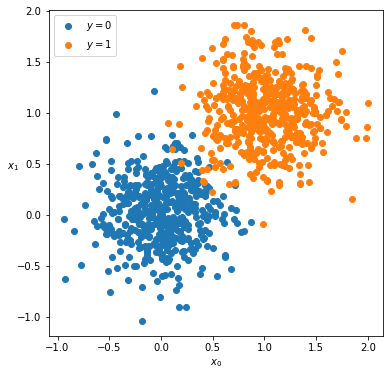

In [8]:
data = [np.append(rng.multivariate_normal([(y:=rng.integers(0, 2)), y],[[0.1, 0], [0, 0.1]]), y) for i in range(1000)]
data = np.array(data)
X0, X1, Y = data.T
mask = (Y==0)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.scatter(X0[mask], X1[mask], label="$y=0$")
ax.scatter(X0[~mask], X1[~mask], label="$y=1$")
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$", rotation='horizontal')
ax.legend(loc="upper left")
fig.show()


## Model Construction

In [9]:
%%capture
model = LogisticRegression()
model.fit(data[:, :-1], Y)

## Result

In [10]:
coef = ('+{:.2f}'.format(x) if x > 0 else '{:.2f}'.format(x) for x in model.coef_[0])
display(Math('y_i = L({:.2f}{} x_0 {} x_1)'.format(model.intercept_[0], *coef)))
print("Accuracy:", model.score(data[:, :-1], Y))

<IPython.core.display.Math object>

Accuracy: 0.987


In [11]:
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.04),
                     np.arange(y_min, y_max, 0.04))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

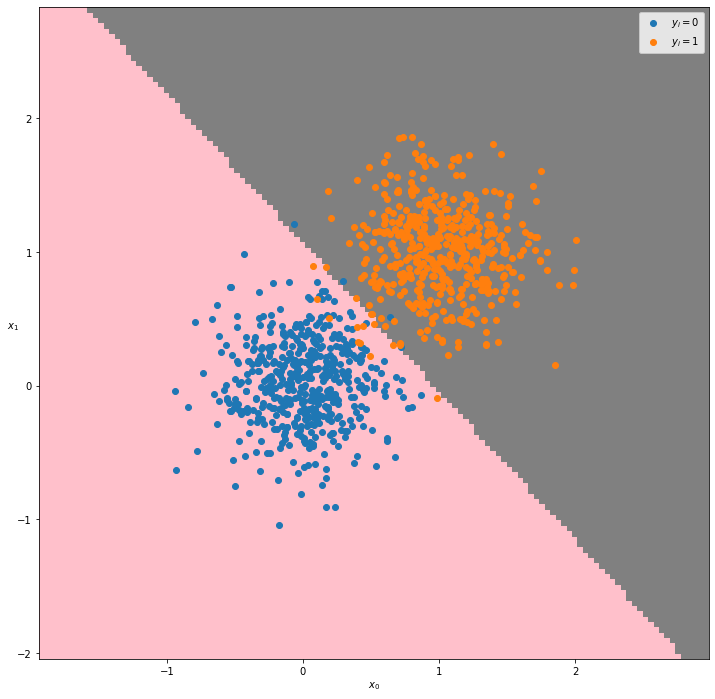

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.pcolormesh(xx, yy, Z, cmap=cmap)
ax.scatter(X0[mask], X1[mask], label="$y_i=0$")
ax.scatter(X0[~mask], X1[~mask], label="$y_i=1$")
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$", rotation="horizontal")
ax.legend(loc="upper right")
fig.show()